# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from models.oface_mouth_model import OpenfaceMouth
from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from net_trainer import NetworkTrainer, BaseModel, Optimizer

# Start Network Trainer

In [3]:
#req = cts.ICAO_REQ.HAT

kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': f'Training network for ALL requisites',
        'tags': ['vgg16', 'ground truths', 'adamax', 'fvc', 'binary_output', 'mtl'],
        'src_files': ['net_trainer.py']
    },
    'properties': {
#         'tagger_model': OpenfaceMouth(),
#         'dl_names': {'train_validation':
#                            [DLName.VGGFACE2, DLName.CALTECH, DLName.FVC_PYBOSSA, 
#                             DLName.CVL, DLName.FEI_DB, DLName.GEORGIA_TECH, DLName.COLOR_FERET,
#                             DLName.ICPR04, DLName.IMFDB, DLName.IJBC, DLName.LFW, DLName.CASIA_WF,
#                             DLName.GENKI4K_DB],
#                       'test': [],
        'reqs': list(cts.ICAO_REQ),
        'aligned': True,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'save_trained_model': False
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 10,
        'early_stopping': 10,
        'shuffle': True,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'train_prop': 0.9,
        'validation_prop': 0.05,
        'test_prop': 0.05,
        'seed': 42,
        'validation_split': 0.1,
        'dropout': 0.3
    }
}

trainer = NetworkTrainer(**kwargs)

-----
Use Neptune:  True
-----
Args: 
{'exp_params': {'description': 'Training network for ALL requisites',
                'name': 'train_vgg16',
                'src_files': ['net_trainer.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'fvc',
                         'binary_output',
                         'mtl']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7fee320b9040>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                      'early_stopping': 10,
                      'learning_rate': 0.001,
                      'n_epochs': 10,
                      'optimizer': <Optimizer.ADAMAX: 'Adamax'>,
                      'seed': 42,
                      'shuffle': True,
                      'test_prop': 0.05,
                      'train_prop': 0.9,
           

# Load Data

In [4]:
trainer.load_training_data()

Loading data
Loading GT FVC...
..Ignoring 19 empty label values
Input data.shape: (5761, 26)
Data loaded


# Data Balancing

In [5]:
trainer.balance_input_data()

Not balancing input_data


# Data Generators

In [6]:
trainer.setup_data_generators()

Starting data generators
Found 4926 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5761


# Use Neptune

In [7]:
trainer.start_neptune()
trainer.create_experiment()

Starting Neptune


Creating experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training/e/IC-168


# Labels Distribution

# Create Model

In [8]:
trainer.create_model()

Creating model...
Model created


# Vizualize Model

# Training Model

In [9]:
trainer.train_model()

Training VGG16 network
Epoch 1/10
76/76 [==============================] - 69s 902ms/step - loss: 1.1878 - mouth_loss: 0.6227 - rotation_loss: 0.6010 - l_away_loss: 0.6562 - eyes_closed_loss: 0.5898 - close_loss: 0.2490 - hat_loss: 0.5260 - dark_glasses_loss: 0.4861 - frames_heavy_loss: 0.2385 - frame_eyes_loss: 0.6428 - flash_lenses_loss: 0.5981 - veil_loss: 0.4039 - reflection_loss: 0.6929 - light_loss: 0.4050 - sh_face_loss: 0.6820 - sh_head_loss: 0.6705 - blurred_loss: 0.4426 - ink_mark_loss: 0.2140 - skin_tone_loss: 0.6910 - washed_out_loss: 0.2412 - pixelation_loss: 0.3927 - hair_eyes_loss: 0.5476 - background_loss: 0.6892 - red_eyes_loss: 0.5955 - mouth_accuracy: 0.7291 - rotation_accuracy: 0.7476 - l_away_accuracy: 0.6818 - eyes_closed_accuracy: 0.7818 - close_accuracy: 0.9768 - hat_accuracy: 0.8431 - dark_glasses_accuracy: 0.8758 - frames_heavy_accuracy: 0.9840 - frame_eyes_accuracy: 0.7032 - flash_lenses_accuracy: 0.7840 - veil_accuracy: 0.9258 - reflection_accuracy: 0.5226 -

# Plots

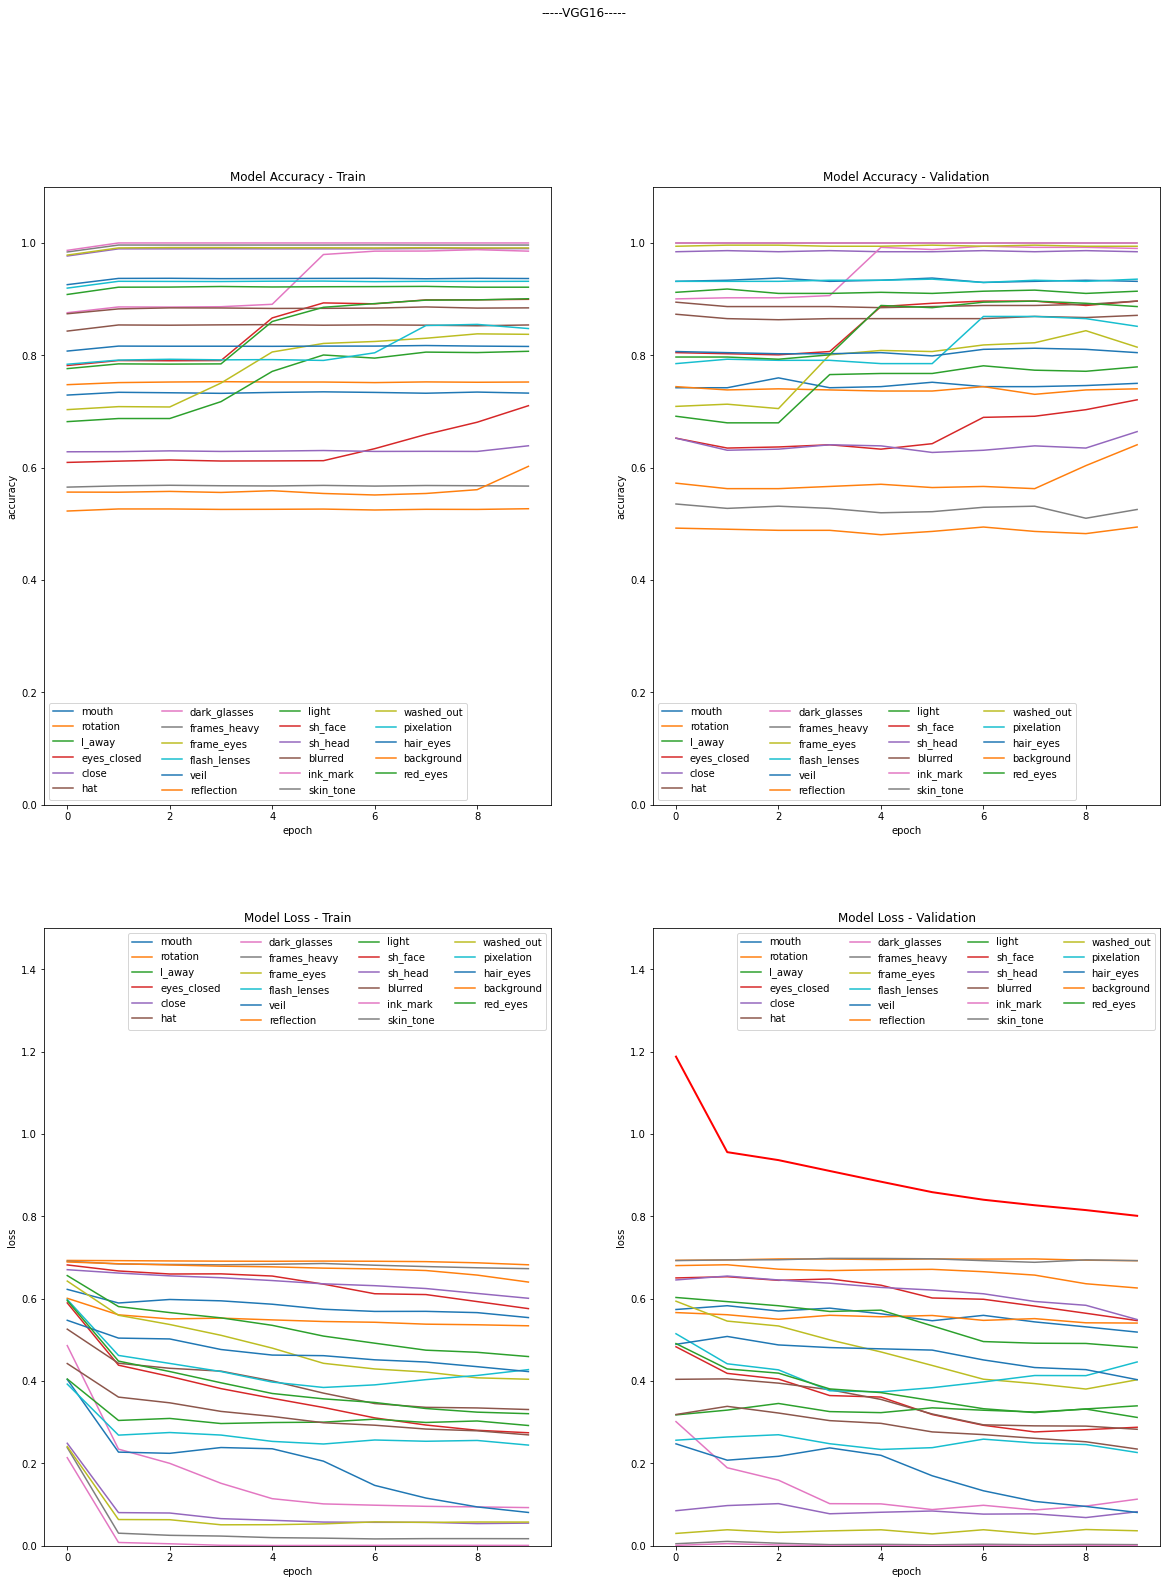

In [53]:
trainer.draw_training_history()

# Load Best Model

In [ ]:
trainer.load_best_model()

# Saving Trained Model

# Test Trained Model

In [ ]:
trainer.test_model()

# Evaluate Model

In [ ]:
trainer.evaluate_model()

# Vizualize Model Classification

In [ ]:
trainer.vizualize_predictions()

# Finishing Experiment Manager

In [ ]:
trainer.finish_experiment()